In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Load data
accuracy_data_fpath = "/Users/amlalejini/gen_ws/cse881_mining_for_ecotypes/web/data/accuracy_table.csv"
# Make easier to plot
content = ""
with open(accuracy_data_fpath, "r") as fp:
    content = fp.read().strip("\n").split("\n")
header = content[0] + ",cluster_algorithm,similarity_metric,total_orgs"
content = content[1:]
new_content = []
for line in content:
    line = line.split(",")
    num_wrong = int(line[5])
    num_correct = int(line[4])
    cluster_params = line[1]
    algorithm = cluster_params.split("__")[0]
    similarity_metric = cluster_params.split("_")[-1]
    line = ",".join(line) + "," + algorithm + "," + similarity_metric + "," + str(num_wrong + num_correct)
    new_content.append(line)
new_content = header + "\n" + "\n".join(new_content)
with open("accuracy.csv", "w") as fp:
    fp.write(new_content)

accuracy_df = pd.read_csv("accuracy.csv")

In [49]:
# Get totals from each treatment/cluster param replicate
at_df = accuracy_df[accuracy_df.time == "total"]
# Get DBScan totals
#db_acc_totals = at_df[(at_df["cluster_params"] == "db_cluster__ep_0p1__mp_5__mode_both") | (at_df["cluster_params"] == "db_cluster__ep_0p1__mp_5__mode_phenotype") | (at_df["cluster_params"] == "db_cluster__ep_0p1__mp_5__mode_genotype")]
# Get Spectral totals#
#spectral_acc_totals = at_df[(at_df["cluster_params"] == "spec_cluster__nc_6__mode_both") | (at_df["cluster_params"] == "spec_cluster__nc_6__mode_phenotype") | (at_df["cluster_params"] == "spec_cluster__nc_6__mode_genotype")]

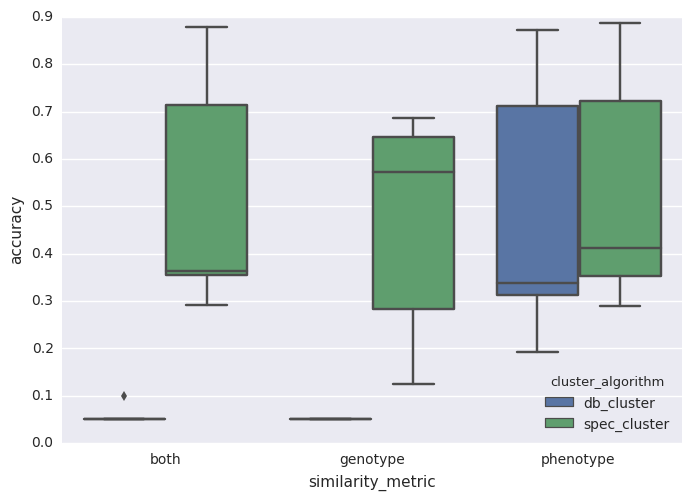

In [50]:
ax = sns.boxplot(x="similarity_metric", y="accuracy", hue="cluster_algorithm", data=at_df)
#at_df

In [89]:
# Time series
tsa_df = accuracy_df[accuracy_df.time != "total"]
#tsa_df["time"] = tsa_df["time"].apply(pd.to_numeric)
tsa_df = tsa_df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
db_tsa_df = tsa_df[tsa_df["cluster_algorithm"] == "db_cluster"]
spec_tsa_df = tsa_df[tsa_df["cluster_algorithm"] == "spec_cluster"]

# Sepa

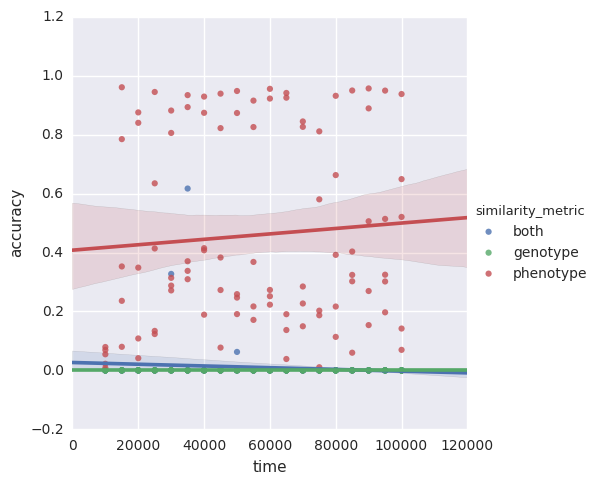

In [90]:
ax = sns.lmplot(x="time", y="accuracy", data=db_tsa_df, hue = "similarity_metric")

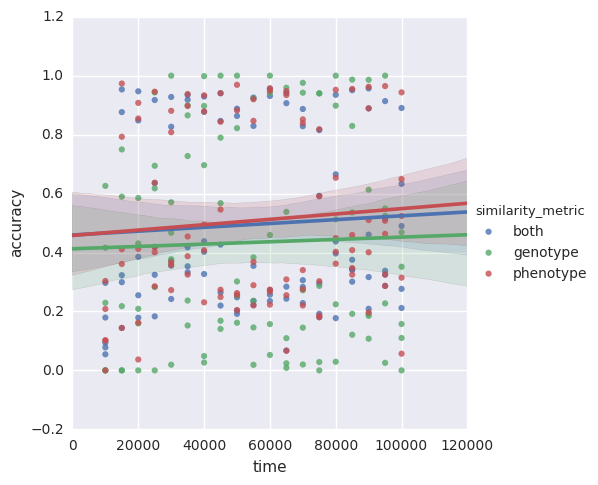

In [91]:
ax = sns.lmplot(x="time", y="accuracy", data=spec_tsa_df, hue = "similarity_metric")

In [103]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import numpy as np

In [122]:
# Spectral clustering similarity: both
spec_tsa_df.loc[:,"Eins"] = np.ones((len(spec_tsa_df),))
db_tsa_df.loc[:,"Eins"] = np.ones((len(db_tsa_df),))


Y = spec_tsa_df[spec_tsa_df["similarity_metric"] == "both"]["accuracy"]
X = spec_tsa_df[spec_tsa_df["similarity_metric"] == "both"][["time", "Eins"]]
result = sm.OLS(Y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               accuracy   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3377
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.563
Time:                        17:18:27   Log-Likelihood:                -19.275
No. Observations:                  95   AIC:                             42.55
Df Residuals:                      93   BIC:                             47.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
time        6.522e-07   1.12e-06      0.581      0.563     -1.58e-06  2.88e-06
Eins           0.4593      0.069      6.661      0.000         0.322     0.596
==============================================================================
Omnibus:                       95.061   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.475
Skew:                           0.481   Prob(JB):                      0.00322
Kurtosis:                       1.595   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
Y = spec_tsa_df[spec_tsa_df["similarity_metric"] == "phenotype"]["accuracy"]
X = spec_tsa_df[spec_tsa_df["similarity_metric"] == "phenotype"][["time", "Eins"]]
result = sm.OLS(Y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               accuracy   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6593
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.419
Time:                        17:18:35   Log-Likelihood:                -19.109
No. Observations:                  95   AIC:                             42.22
Df Residuals:                      93   BIC:                             47.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
time        9.097e-07   1.12e-06      0.812      0.419     -1.32e-06  3.13e-06
Eins           0.4579      0.069      6.652      0.000         0.321     0.595
==============================================================================
Omnibus:                       62.015   Durbin-Watson:                   0.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.264
Skew:                           0.376   Prob(JB):                      0.00974
Kurtosis:                       1.668   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
Y = spec_tsa_df[spec_tsa_df["similarity_metric"] == "genotype"]["accuracy"]
X = spec_tsa_df[spec_tsa_df["similarity_metric"] == "genotype"][["time", "Eins"]]
result = sm.OLS(Y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               accuracy   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.08800
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.767
Time:                        17:18:36   Log-Likelihood:                -35.828
No. Observations:                  95   AIC:                             75.66
Df Residuals:                      93   BIC:                             80.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
time        3.963e-07   1.34e-06      0.297      0.767     -2.26e-06  3.05e-06
Eins           0.4126      0.082      5.027      0.000         0.250     0.576
==============================================================================
Omnibus:                       74.021   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.319
Skew:                           0.350   Prob(JB):                      0.00947
Kurtosis:                       1.634   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
Y = db_tsa_df[db_tsa_df["similarity_metric"] == "both"]["accuracy"]
X = db_tsa_df[db_tsa_df["similarity_metric"] == "both"][["time", "Eins"]]
result = sm.OLS(Y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               accuracy   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.196
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.277
Time:                        17:18:36   Log-Likelihood:                 116.88
No. Observations:                  95   AIC:                            -229.8
Df Residuals:                      93   BIC:                            -224.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
time       -2.928e-07   2.68e-07     -1.094      0.277     -8.24e-07  2.39e-07
Eins           0.0267      0.016      1.625      0.108        -0.006     0.059
==============================================================================
Omnibus:                      174.519   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13102.398
Skew:                           7.326   Prob(JB):                         0.00
Kurtosis:                      58.636   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
Y = db_tsa_df[db_tsa_df["similarity_metric"] == "phenotype"]["accuracy"]
X = db_tsa_df[db_tsa_df["similarity_metric"] == "phenotype"][["time", "Eins"]]
result = sm.OLS(Y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               accuracy   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5577
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.457
Time:                        17:18:37   Log-Likelihood:                -28.175
No. Observations:                  95   AIC:                             60.35
Df Residuals:                      93   BIC:                             65.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
time        9.204e-07   1.23e-06      0.747      0.457     -1.53e-06  3.37e-06
Eins           0.4079      0.076      5.386      0.000         0.258     0.558
==============================================================================
Omnibus:                      106.515   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.564
Skew:                           0.400   Prob(JB):                      0.00508
Kurtosis:                       1.575   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
Y = db_tsa_df[db_tsa_df["similarity_metric"] == "genotype"]["accuracy"]
X = db_tsa_df[db_tsa_df["similarity_metric"] == "genotype"][["time", "Eins"]]
result = sm.OLS(Y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               accuracy   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Dec 2016   Prob (F-statistic):                nan
Time:                        17:18:37   Log-Likelihood:                    inf
No. Observations:                  95   AIC:                              -inf
Df Residuals:                      93   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
time                0          0        nan        nan             0         0
Eins                0          0        nan        nan             0         0
==============================================================================
Omnibus:                        1.045   Durbin-Watson:                     nan
Prob(Omnibus):                  0.593   Jarque-Bera (JB):               35.625
Skew:                           0.000   Prob(JB):                     1.84e-08
Kurtosis:                       0.000   Cond. No.                     1.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""